In [ ]:
%pip install numpy
%pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = np.loadtxt(r'assets\spiral.csv', delimiter=',')
X = data[:, :2].T
Y = data[:, 2].astype(int).T
p, N = X.shape

In [5]:
# Funções auxiliares
def sinal(u_t):
    return np.where(u_t >= 0, 1, -1)

def EQM(X, Y, w):
    u_t = w.T @ X
    erros = Y - u_t
    return np.mean(erros ** 2) / 2

In [6]:
# Parâmetros do modelo
max_epoch = 1000
pr = 1e-5
lr = 0.02


# Listas para armazenar os resultados
acuracias, sensibilidade, especificidade, matrizes_de_confusao = [], [], [], []


In [7]:
rodadas = 500

In [8]:
for i in range(rodadas):
    print(f"Calculando: {i+1}/{rodadas}", end='\r')

    # Adicionar pesos iniciais aleatórios
    W = np.random.random_sample((p + 1, 1))

    # Separação do conjunto de dados em treino e teste
    seed = np.random.permutation(N)
    Xr, yr = X[:, seed], Y[seed]
    split = int(N * 0.8)
    X_treino, y_treino = Xr[:, :split], yr[:split]
    X_teste, y_teste = Xr[:, split:], yr[split:]

    # Normalização + adição de X0 = -1
    norma_treino = np.linalg.norm(X_treino, axis=0, keepdims=True)
    X_treino_norm = np.vstack((-np.ones((1, split)), X_treino / norma_treino))
    X_teste_norm = np.vstack((-np.ones((1, N - split)), X_teste / norma_treino[:, :N - split]))

    # Treinamento vetorizado
    EQM1, EQM2, epochs = 1, 0, 0
    while epochs < max_epoch and abs(EQM1 - EQM2) > pr:
        EQM1 = EQM(X_treino_norm, y_treino, W)
        u_t = W.T @ X_treino_norm
        e_t = y_treino - u_t.flatten()
        W += lr * (X_treino_norm @ e_t[:, None]) / split
        EQM2 = EQM(X_treino_norm, y_treino, W)
        epochs += 1

    # Teste do modelo
    u_test = W.T @ X_teste_norm
    Y_predito = sinal(u_test.flatten())

    # Métricas
    acertos = np.sum(Y_predito == y_teste)
    acuracias.append(acertos / len(y_teste))

    matriz_confusao = np.array([
        [np.sum((Y_predito == 1) & (y_teste == 1)), np.sum((Y_predito == 1) & (y_teste == -1))],
        [np.sum((Y_predito == -1) & (y_teste == 1)), np.sum((Y_predito == -1) & (y_teste == -1))]
    ])
    matrizes_de_confusao.append(matriz_confusao)

    # Sensibilidade e especificidade
    TP, FP = matriz_confusao[0, 0], matriz_confusao[0, 1]
    FN, TN = matriz_confusao[1, 0], matriz_confusao[1, 1]
    sensibilidade.append(TP / (TP + FN) if (TP + FN) > 0 else 0)
    especificidade.append(TN / (TN + FP) if (TN + FP) > 0 else 0)


In [9]:
# Identificar rodadas de maior e menor acurácia
rodada_max_acuracia = np.argmax(acuracias)
rodada_min_acuracia = np.argmin(acuracias)

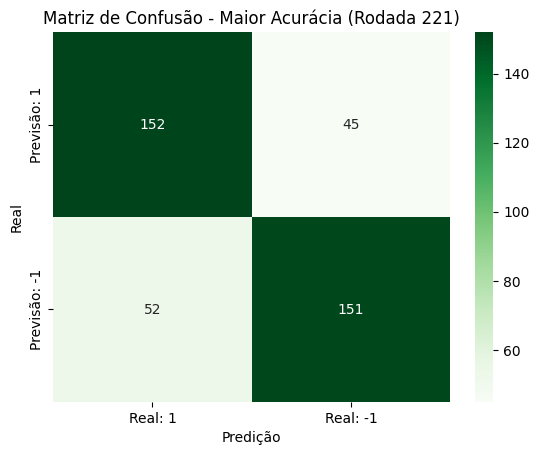

In [10]:
# Gráficos das matrizes de confusão
sns.heatmap(matrizes_de_confusao[rodada_max_acuracia], annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Real: 1', 'Real: -1'], yticklabels=['Previsão: 1', 'Previsão: -1'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title(f'Matriz de Confusão - Maior Acurácia (Rodada {rodada_max_acuracia + 1})')
plt.show()

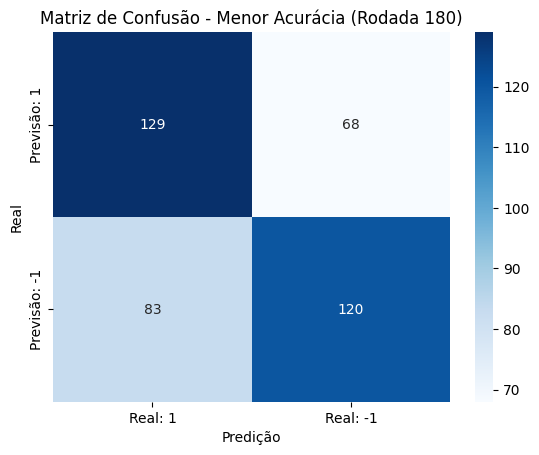

In [11]:
sns.heatmap(matrizes_de_confusao[rodada_min_acuracia], annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Real: 1', 'Real: -1'], yticklabels=['Previsão: 1', 'Previsão: -1'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title(f'Matriz de Confusão - Menor Acurácia (Rodada {rodada_min_acuracia + 1})')
plt.show()

In [12]:
# Exibir métricas finais
print(f'''Acurácia
    Média: {np.mean(acuracias):.4f} 
    DP: {np.std(acuracias):.4f}
    Maior valor: {np.max(acuracias):.4f}
    Menor valor: {np.min(acuracias):.4f}''', end='\n\n')

print(f'''Sensibilidade
    Média: {np.mean(sensibilidade):.4f}
    DP: {np.std(sensibilidade):.4f}
    Maior valor: {np.max(sensibilidade):.4f}
    Menor valor: {np.min(sensibilidade):.4f}''', end='\n\n')

print(f'''Especificidade
    Média: {np.mean(especificidade):.4f}
    DP: {np.std(especificidade):.4f}
    Maior valor: {np.max(especificidade):.4f}
    Menor valor: {np.min(especificidade):.4f}''', end='\n\n')


Acurácia
    Média: 0.6908 
    DP: 0.0205
    Maior valor: 0.7575
    Menor valor: 0.6225

Sensibilidade
    Média: 0.6926
    DP: 0.0319
    Maior valor: 0.7857
    Menor valor: 0.5902

Especificidade
    Média: 0.6896
    DP: 0.0318
    Maior valor: 0.8103
    Menor valor: 0.6040

